In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [22]:
def ExpGaussian(x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2):
    f= a0+a1*(x-x0)+A*np.exp(-0.5*((mu-x)/sigma)**2)+B*np.exp(-0.5*((mu2-x)/sigma2)**2)
    return f 
def Gaussian(x, A,sigma, mu):
    g=A*np.exp(-0.5*((mu-x)/sigma)**2)
    return g
def GaussianArea(A,sigma): #Intensidad 
    return A*sigma*np.sqrt(2.*np.pi)

In [23]:
AAire22Na=np.loadtxt('Aire_22Na_mtime_05min.dat', unpack=True)
AArena22Na05=np.loadtxt('Arena_05cm_22Na_mtime_05min.dat',unpack=True)
AArena22Na10=np.loadtxt('Arena_10cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na8=np.loadtxt('Parafina_08cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na16=np.loadtxt('Parafina_16cm_22Na_mtime_05min.dat',unpack=True)
N=[i+1 for i in range(1024)]

In [24]:
#Energy Calibration E= a0+a1*N
def EnergyCalibration22Na(x):
    E2Na=1274.5
    A2=np.amax(AAire22Na[600:1000]) #Corresponds to E2Na=1274.5 keV
    m2=np.where(AAire22Na==A2)[0]

    E1Na=511
    A1=np.amax(AAire22Na[200:400]) #Corresponds to E1Na=511 keV
    m1=np.where(AAire22Na==A1)[0]
    E= E1Na+ ((E1Na-E2Na)/(m2-m1))*m1 + ((E2Na-E1Na)/(m2-m1))*x
    return E 

E22Na=EnergyCalibration22Na(N)

In [25]:
#1 p0=[x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2]
print('Aire')
poptA, pcovA = curve_fit(ExpGaussian, N[250:1024], AAire22Na[250:1024], p0=[700,-10,335,29300,12,350, 3600,15,815])
Ad1Aire22Na=[Gaussian(i, poptA[3], poptA[4], poptA[5]) for i in range(len(N))]
EAire22Na=[ExpGaussian(i, poptA[0], poptA[1], poptA[2], poptA[3], poptA[4], poptA[5], poptA[6], poptA[7], poptA[8]) for i in range(len(N))]
print('A en f1',poptA[3], np.sqrt(np.diag(pcovA))[3])
print('sigma en f1',poptA[4], np.sqrt(np.diag(pcovA))[4])
print('A en f2',poptA[6], np.sqrt(np.diag(pcovA))[6])
print('sigma en f2',poptA[7], np.sqrt(np.diag(pcovA))[7])
print('I en f1',GaussianArea(poptA[3],poptA[4]))
print('I en f2',GaussianArea(poptA[6],poptA[7]))

Aire
('A en f1', 29009.238651421463, 54.586754453874477)
('sigma en f1', 10.445164116323758, 0.023292568830523899)
('A en f2', 4368.5854567126216, 43.021779537133142)
('sigma en f2', 16.733408618722471, 0.19494282759541634)
('I en f1', 759524.05520618637)
('I en f2', 183237.84949397433)


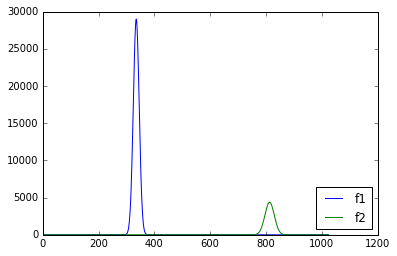

In [26]:
plt.show()
plt.plot(N,Gaussian(N,poptA[3], poptA[4], poptA[5]), label='f1')
plt.plot(N,Gaussian(N,poptA[6], poptA[7], poptA[8]), label='f2')
plt.legend(loc=4)

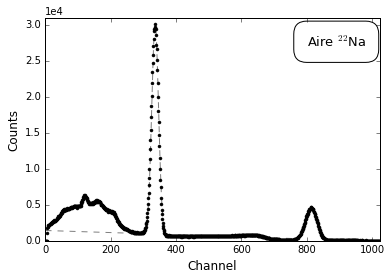

In [27]:
plt.show()
#plt.xlim(300,370)
#plt.xlim(700,900)
plt.ylim(0, 31000)
plt.xlim(0,1024)
#plt.plot(N, Ad1Aire22Na, '--')
#plt.plot(N, Ad2Aire22Na, '.',color='black')
plt.plot(N, EAire22Na, '--',color='grey')
plt.plot(N,AAire22Na, '.',label='Air ${}^{22}$Na', color='black')
plt.text(800, 27000, 'Aire ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'), fontsize=13)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.savefig("Aire22Na.pdf")

In [28]:
#p0=[x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2]
print('Arena d=0.5 cm')
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AArena22Na05[300:1024], p0=[1500,-100,335,14500,12,335,2700,18,815])
EArena22Na05=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]
#print(popt, np.sqrt(np.diag(pcov)))
print('A de f1',popt[3], np.sqrt(np.diag(pcov))[3])
print('sigma de f1',popt[4], np.sqrt(np.diag(pcov))[4])
print('A de f2',popt[6], np.sqrt(np.diag(pcov))[6])
print('sigma de f2',popt[7], np.sqrt(np.diag(pcov))[7])
print('I en f1',GaussianArea(popt[3],popt[4]))
print('I en f2',GaussianArea(popt[6],popt[7]))

Arena d=0.5 cm
('A de f1', 14389.380751135728, 59.644545166414204)
('sigma de f1', 11.162094054061322, 0.055430571466317774)
('A de f2', 2724.9665262468857, 48.34070789210562)
('sigma de f2', 16.650069054910897, 0.34940340738806525)
('I en f1', 402603.65775785479)
('I en f2', 113727.93274424862)


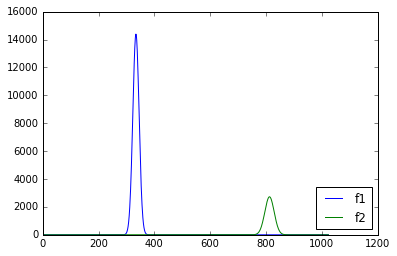

In [29]:
plt.show()
plt.plot(N,Gaussian(N,popt[3], popt[4], popt[5]), label='f1')
plt.plot(N,Gaussian(N,popt[6], popt[7], popt[8]), label='f2')
plt.legend(loc=4)

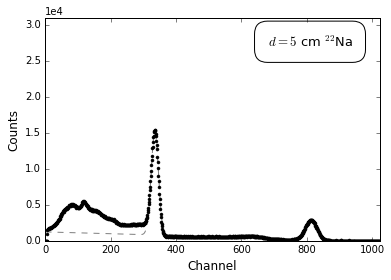

In [30]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EArena22Na05, '--',color='grey', )
plt.plot(N,AArena22Na05, '.',label='Aire ${}^{22}$Na', color='black')
plt.text(680, 27000, '$d=5$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'), fontsize=13)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.savefig("Arena22Na05.pdf")

In [31]:
#p0=[x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2]
print('Arena d=10 cm')
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AArena22Na10[300:1024], p0=[1500,-100,335,8200,12,335, 2100,18,815])
EArena22Na10=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]
#print(popt, np.sqrt(np.diag(pcov)))
print('A de f1',popt[3], np.sqrt(np.diag(pcov))[3])
print('sigma de f1',popt[4], np.sqrt(np.diag(pcov))[4])
print('A de f2',popt[6], np.sqrt(np.diag(pcov))[6])
print('sigma de f2',popt[7], np.sqrt(np.diag(pcov))[7])
print('I en f1',GaussianArea(popt[3],popt[4]))
print('I en f2',GaussianArea(popt[6],popt[7]))

Arena d=10 cm
('A de f1', 8457.6202401996161, 50.240453551146665)
('sigma de f1', 11.832760323864552, 0.084241797630166995)
('A de f2', 1888.169242011063, 41.898007913900074)
('sigma de f2', 16.528127512703282, 0.43372562102812706)
('I en f1', 250855.82082662699)
('I en f2', 78226.609538904813)


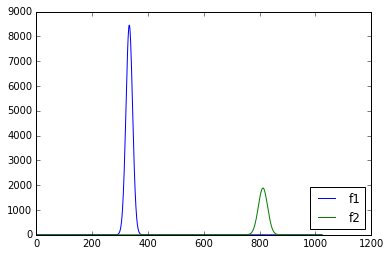

In [32]:
plt.show()
plt.plot(N,Gaussian(N,popt[3], popt[4], popt[5]), label='f1')
plt.plot(N,Gaussian(N,popt[6], popt[7], popt[8]), label='f2')
plt.legend(loc=4)

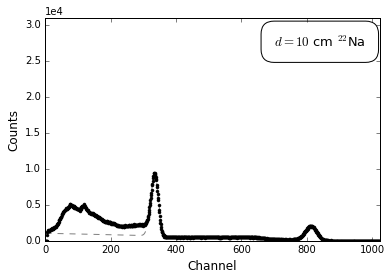

In [33]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EArena22Na10, '--',color='grey', )
plt.plot(N,AArena22Na10, '.',label='Aire ${}^{22}$Na', color='black')
plt.text(700, 27000, '$d=10$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'), fontsize=13)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.savefig("Arena22Na10.pdf")

In [34]:
print('Parafina d=8 cm')
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AParafina22Na8[300:1024], p0=[2000,-100,335,14000,12,335, 2800,18,815])
EParafina22Na8=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]
print('A de f1',popt[3], np.sqrt(np.diag(pcov))[3])
print('sigma de f1',popt[4], np.sqrt(np.diag(pcov))[4])
print('A de f2',popt[6], np.sqrt(np.diag(pcov))[6])
print('sigma de f2',popt[7], np.sqrt(np.diag(pcov))[7])
print('I en f1',GaussianArea(popt[3],popt[4]))
print('I en f2',GaussianArea(popt[6],popt[7]))

Parafina d=8 cm
('A de f1', 14639.76464514785, 57.346590372003035)
('sigma de f1', 11.171860439254331, 0.052429203969746617)
('A de f2', 2747.1921762270508, 46.4352637694913)
('sigma de f2', 16.690837222518773, 0.33376482377467609)
('I en f1', 409967.59559941123)
('I en f2', 114936.26944289694)


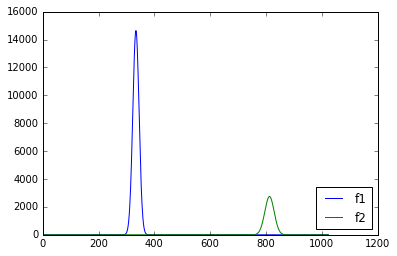

In [35]:
plt.show()
plt.plot(N,Gaussian(N,popt[3], popt[4], popt[5]), label='f1')
plt.plot(N,Gaussian(N,popt[6], popt[7], popt[8]), label='f2')
plt.legend(loc=4)

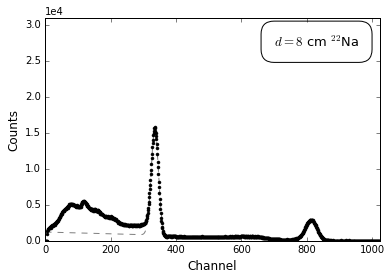

In [36]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EParafina22Na8, '--',color='grey', )
plt.plot(N,AParafina22Na8, '.',label='Parafina ${}^{22}$Na', color='black')
plt.text(700, 27000, '$d=8$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'), fontsize= 13)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.savefig("Parafina22Na8.pdf")

In [37]:
#p0=[x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2]
print('Parafina d=16 cm')
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AParafina22Na16[300:1024], p0=[1500,-100,335,7200,12,335, 1700,18,815])
EParafina22Na16=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]
#print(popt, np.sqrt(np.diag(pcov)))
print('A de f1',popt[3], np.sqrt(np.diag(pcov))[3])
print('sigma de f1',popt[4], np.sqrt(np.diag(pcov))[4])
print('A de f2',popt[6], np.sqrt(np.diag(pcov))[6])
print('sigma de f2',popt[7], np.sqrt(np.diag(pcov))[7])
print('I en f1',GaussianArea(popt[3],popt[4]))
print('I en f2',GaussianArea(popt[6],popt[7]))

Parafina d=16 cm
('A de f1', 7733.2983279168757, 47.290521750269242)
('sigma de f1', 11.975724962028586, 0.087580977630424856)
('A de f2', 1777.8391073028608, 39.326459151442023)
('sigma de f2', 16.682085119807979, 0.43651770651424682)
('I en f1', 232143.49136235463)
('I en f2', 74341.740082065371)


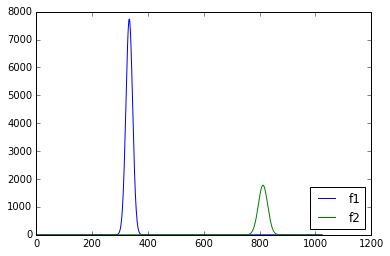

In [38]:
plt.show()
plt.plot(N,Gaussian(N,popt[3], popt[4], popt[5]), label='f1')
plt.plot(N,Gaussian(N,popt[6], popt[7], popt[8]), label='f2')
plt.legend(loc=4)

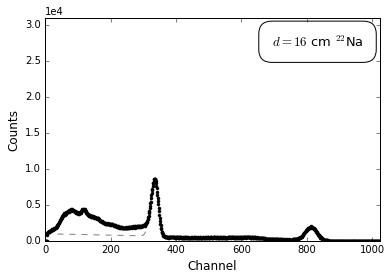

In [39]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EParafina22Na16, '--',color='grey', )
plt.plot(N,AParafina22Na16, '.',label='Parafina ${}^{22}$Na', color='black')
plt.text(693, 27000, '$d=16$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'), fontsize= 13)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.savefig("Parafina22Na16.pdf")